<a href="https://colab.research.google.com/github/Rokibul-Islam-Robi/Machine-Learning-Data-Driven-I-DS424-/blob/main/DS424_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Model

In [1]:
import tensorflow as tf
# Create tensors
scalar = tf.constant(7)
vector = tf.constant([1, 2, 3])
matrix = tf.constant([[1, 2], [3, 4]])
print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:", matrix)
# Tensor operations
added = tf.add(vector, [4, 5, 6])
multiplied = tf.multiply(matrix, 2)
reshaped = tf.reshape(matrix, [4, 1])
print("Added vector:", added.numpy())
print("Multiplied matrix:", multiplied.numpy())
print("Reshaped matrix:", reshaped.numpy())

Scalar: tf.Tensor(7, shape=(), dtype=int32)
Vector: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
Matrix: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Added vector: [5 7 9]
Multiplied matrix: [[2 4]
 [6 8]]
Reshaped matrix: [[1]
 [2]
 [3]
 [4]]


In [2]:
import numpy as np
a = tf.constant([[1, 2], [3, 4]], dtype=tf.int32)
b = tf.constant([[0.5, 0.25], [0.75, 1.0]], dtype=tf.float32)
c = tf.convert_to_tensor(np.arange(12).reshape(3, 4), dtype=tf.float32)
print('Tensor a:', a)
print('Tensor b dtype:', b.dtype, 'shape:', b.shape)
print('Tensor c shape & values:\n', c.numpy())

Tensor a: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Tensor b dtype: <dtype: 'float32'> shape: (2, 2)
Tensor c shape & values:
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


In [ ]:
# Broadcasting example
x = tf.constant([[1., 2.], [3., 4.]])
y = tf.constant([[5.], [6.]]) # Will broadcast to match x's shape
print('x + y (broadcasted):\n', x + y)
print('Matrix multiplication (x @ x):\n', tf.matmul(x, x))

x + y (broadcasted):
 tf.Tensor(
[[ 6.  7.]
 [ 9. 10.]], shape=(2, 2), dtype=float32)
Matrix multiplication (x @ x):
 tf.Tensor(
[[ 7. 10.]
 [15. 22.]], shape=(2, 2), dtype=float32)


In [ ]:
# Gradient example
x = tf.Variable([[1., 2.], [3., 4.]])
with tf.GradientTape() as tape:
    y = tf.reduce_sum(x ** 2)
dy_dx = tape.gradient(y, x)
print('dy/dx =', dy_dx.numpy())

dy/dx = [[2. 4.]
 [6. 8.]]


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Build model
inputs = keras.Input(shape=(28, 28), name='input_layer')
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_functional_model')
model.summary()

Model: "mnist_functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7982 - loss: 0.6595 - val_accuracy: 0.9693 - val_loss: 0.1173
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9479 - loss: 0.1785 - val_accuracy: 0.9733 - val_loss: 0.0879
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9593 - loss: 0.1343 - val_accuracy: 0.9777 - val_loss: 0.0790
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9643 - loss: 0.1128 - val_accuracy: 0.9765 - val_loss: 0.0789
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9707 - loss: 0.0984 - val_accuracy: 0.9787 - val_loss: 0.0728


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9761 - loss: 0.0799
Test accuracy: 0.9761


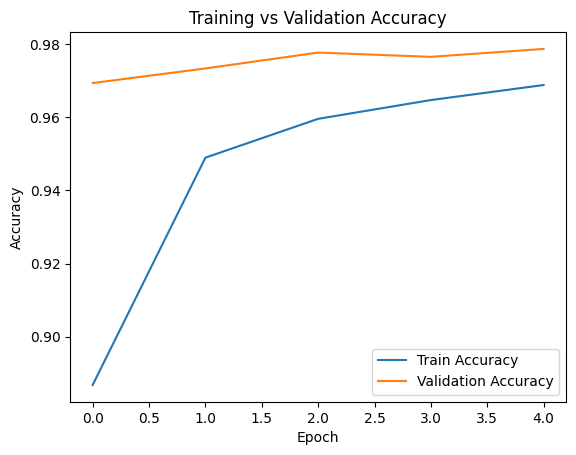

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Save the model to Google Drive
save_path = '/content/drive/MyDrive/model.keras'
model.save(save_path)
print(f' Model saved successfully to {save_path}')

 Model saved successfully to /content/drive/MyDrive/model.keras


In [11]:
load_path = '/content/drive/MyDrive/model.keras'
loaded_model = keras.models.load_model(load_path)
print(' Model loaded successfully from Drive.')

 Model loaded successfully from Drive.


In [12]:
import os
save_dir = os.path.dirname(save_path)
checkpoint_path = os.path.join(save_dir, 'training_checkpoints', 'cp.weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
save_weights_only=True,
verbose=1,
save_freq='epoch')
model.fit(x_train, y_train, epochs=2, batch_size=64, callbacks=[cp_callback])

Epoch 1/2
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9711 - loss: 0.0898
Epoch 1: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9711 - loss: 0.0898
Epoch 2/2
928/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9747 - loss: 0.0788
Epoch 2: saving model to /content/drive/MyDrive/training_checkpoints/cp.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9747 - loss: 0.0788


In [13]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
print('Latest checkpoint:', latest_checkpoint)
if latest_checkpoint:
    model.load_weights(latest_checkpoint)
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Restored checkpoint model accuracy: {acc:.4f}")
else:
    print("No checkpoint found in the specified directory.")

Latest checkpoint: None
No checkpoint found in the specified directory.


# Excercise

In [14]:
inputs = keras.Input(shape=(28, 28), name='input_layer_bn')
x = layers.Flatten() (inputs)

x = layers.Dense(128) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.3) (x)

x = layers.Dense(64) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(10, activation='softmax', name='output_layer_bn')(x)

model2 = keras.Model(inputs=inputs, outputs=outputs, name='mnist_bn_model2')

model2.summary()

Model: "mnist_bn_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_bn (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer_bn (Dense)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

# Comparing Accuracy

In [15]:
model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8075 - loss: 0.6597 - val_accuracy: 0.9642 - val_loss: 0.1291
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9403 - loss: 0.1955 - val_accuracy: 0.9728 - val_loss: 0.0933
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9518 - loss: 0.1568 - val_accuracy: 0.9780 - val_loss: 0.0765
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9629 - loss: 0.1223 - val_accuracy: 0.9792 - val_loss: 0.0726
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9633 - loss: 0.1142 - val_accuracy: 0.9817 - val_loss: 0.0636


In [16]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9760 - loss: 0.0744
Test accuracy: 0.9760


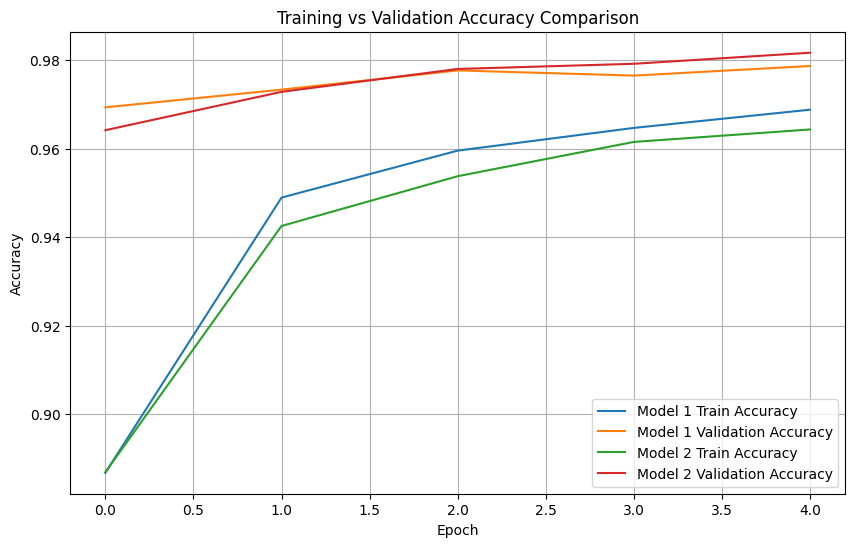

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Model 1 Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.title('Training vs Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc_sgd:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9801 - loss: 0.0639
Test accuracy: 0.9801


In [25]:
model_rms = model2
model_rms.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history4 = model_rms.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9749 - loss: 0.0772 - val_accuracy: 0.9818 - val_loss: 0.0637
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9765 - loss: 0.0725 - val_accuracy: 0.9833 - val_loss: 0.0629
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9761 - loss: 0.0751 - val_accuracy: 0.9815 - val_loss: 0.0677
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9775 - loss: 0.0697 - val_accuracy: 0.9808 - val_loss: 0.0719
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9781 - loss: 0.0729 - val_accuracy: 0.9803 - val_loss: 0.0721


In [26]:
test_loss_rms, test_acc_rms = model_rms.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc_rms:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9804 - loss: 0.0715
Test accuracy: 0.9804


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28), name='input_layer_skip')
x_flatten = layers.Flatten() (inputs)

x = layers.Dense(128, activation='relu') (x_flatten)
x = layers.Dropout(0.3) (x)
x_main = layers.Dense(64, activation='relu') (x)

x_skip = layers.Dense(64, name='skip_projection') (x_flatten)


x_combined = layers.add([x_main, x_skip])

outputs = layers.Dense(10, activation='softmax', name='output_layer_skip')(x_combined)

model_skip = keras.Model(inputs=inputs, outputs=outputs, name='mnist_skip_model')
model_skip.summary()

Model: "mnist_skip_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_skip    │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ input_layer_skip… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │    100,480 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ skip_projection     │ (None, 64)        │     50,240 │ flatten_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ dense_5[0][0],    │
│                     │                   │            │ skip_projection[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer_skip   │ (None, 10)        │        650 │ add[0][0]         │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 159,626 (623.54 KB)

 Trainable params: 159,626 (623.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_skip.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
history_skip = model_skip.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8502 - loss: 0.5098 - val_accuracy: 0.9633 - val_loss: 0.1305
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9509 - loss: 0.1700 - val_accuracy: 0.9720 - val_loss: 0.0959
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9627 - loss: 0.1238 - val_accuracy: 0.9740 - val_loss: 0.0924
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9683 - loss: 0.1027 - val_accuracy: 0.9753 - val_loss: 0.0896
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9699 - loss: 0.0934 - val_accuracy: 0.9728 - val_loss: 0.0879


In [29]:
test_loss_skip, test_acc_skip = model_skip.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc_skip:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9727 - loss: 0.0917
Test accuracy: 0.9727


In [30]:
weights_save_path = '/content/drive/MyDrive/mnist_weights.weights.h5'
model2.save_weights(weights_save_path)
print(f'Model weights saved successfully to {weights_save_path}')

Model weights saved successfully to /content/drive/MyDrive/mnist_weights.weights.h5


In [31]:
import os

inputs = keras.Input(shape=(28, 28), name='input_layer_bn')
x = layers.Flatten() (inputs)

x = layers.Dense(128) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)
x = layers.Dropout(0.3) (x)

x = layers.Dense(64) (x)
x = layers.BatchNormalization() (x)
x = layers.Activation('relu') (x)

outputs = layers.Dense(10, activation='softmax', name='output_layer_bn')(x)


new_model = keras.Model(inputs=inputs, outputs=outputs, name='restored_model')


weights_load_path = '/content/drive/MyDrive/mnist_weights.weights.h5'

try:
    new_model.load_weights(weights_load_path)
    print('Model weights restored successfully.')
except Exception as e:
    print(f"Error loading weights: {e}")

Model weights restored successfully.
